# Inicialización

Entrenar tu red neuronal requiere especificar un valor inicial para los pesos. Un método de inicialización bien elegido ayudará al aprendizaje.  

En este notebook, verás cómo diferentes inicializaciones conducen a diferentes resultados.  

Una inicialización bien elegida puede:  
- Acelerar la convergencia del descenso de gradiente  
- Aumentar las probabilidades de que el descenso de gradiente converja a un error de entrenamiento (y generalización) menor  

Para comenzar, ejecuta la siguiente celda para cargar los paquetes y el conjunto de datos planar que intentarás clasificar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import keras    
#from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
#from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


    

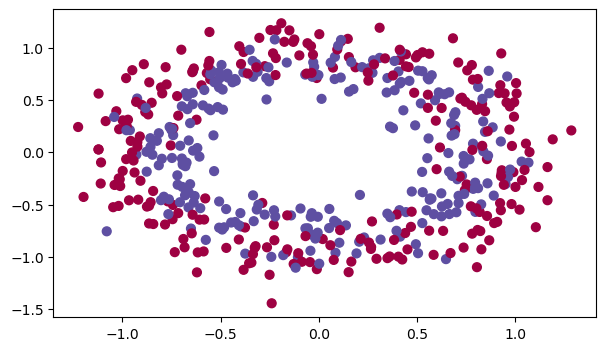

In [2]:
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=500, noise=.15)
#np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.15)

# Visualizar
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X

    

In [4]:
train_Y.shape

(500,)

In [ ]:
train

Queremos entrenar un clasificador que separe los puntos rojos de los azules

## 1 - Modelo de red

Vamos a usar una red neuronal de 3 capas. Aquí están los métodos de inicialización con los que experimentarás:  

- **Inicialización en ceros** (*Zeros initialization*) 
- **Inicialización aleatoria** (*Random initialization*) Inicializa los pesos con valores aleatorios grandes.  
- **Inicialización de He** (*He initialization*) Inicializa los pesos con valores aleatorios escalados según un artículo de He et al., 2015.  


In [65]:
import keras
import torch
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.initializers import RandomNormal, GlorotUniform, HeNormal, random_uniform




# Crear el modelo secuencial
model = Sequential([
    Input(shape=(train_X.shape[1],)),
    Dense(10, activation='relu',kernel_initializer=HeNormal),  # Capa oculta 1
    Dense(5, activation='relu',kernel_initializer=HeNormal),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar la estructura del modelo
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
historia=model.fit(train_X, train_Y, epochs=300, batch_size=500, validation_split=0.2, verbose=2)

Epoch 1/300
1/1 - 0s - 17ms/step - accuracy: 0.7075 - loss: 0.6334 - val_accuracy: 0.6200 - val_loss: 0.6677
Epoch 2/300
1/1 - 0s - 13ms/step - accuracy: 0.7075 - loss: 0.6331 - val_accuracy: 0.6200 - val_loss: 0.6675
Epoch 3/300
1/1 - 0s - 13ms/step - accuracy: 0.7100 - loss: 0.6328 - val_accuracy: 0.6200 - val_loss: 0.6673
Epoch 4/300
1/1 - 0s - 14ms/step - accuracy: 0.7100 - loss: 0.6324 - val_accuracy: 0.6200 - val_loss: 0.6672
Epoch 5/300
1/1 - 0s - 14ms/step - accuracy: 0.7100 - loss: 0.6321 - val_accuracy: 0.6200 - val_loss: 0.6670
Epoch 6/300
1/1 - 0s - 14ms/step - accuracy: 0.7125 - loss: 0.6317 - val_accuracy: 0.6200 - val_loss: 0.6668
Epoch 7/300
1/1 - 0s - 16ms/step - accuracy: 0.7125 - loss: 0.6314 - val_accuracy: 0.6200 - val_loss: 0.6666
Epoch 8/300
1/1 - 0s - 15ms/step - accuracy: 0.7125 - loss: 0.6310 - val_accuracy: 0.6200 - val_loss: 0.6664
Epoch 9/300
1/1 - 0s - 14ms/step - accuracy: 0.7125 - loss: 0.6306 - val_accuracy: 0.6200 - val_loss: 0.6662
Epoch 10/300
1/1 - 

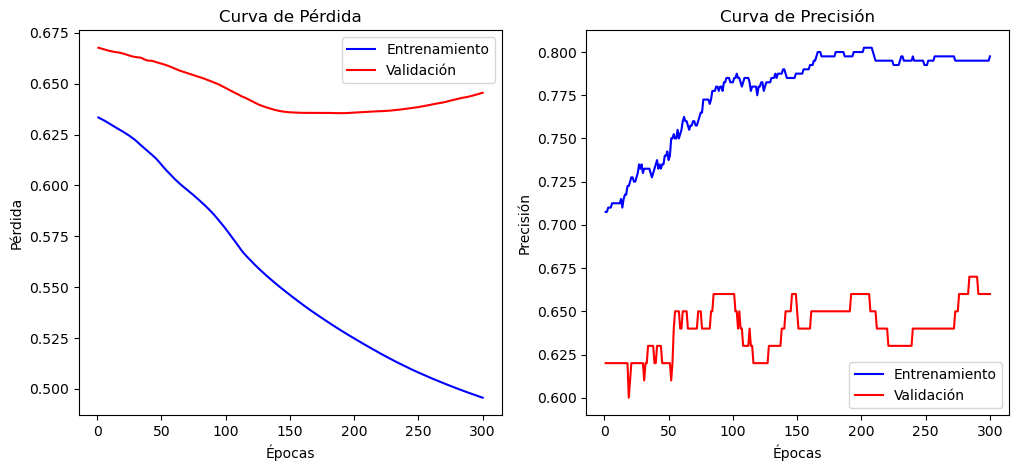

In [71]:
# Extraer la pérdida y precisión del historial
loss = historia.history['loss']
val_loss = historia.history['val_loss']
accuracy = historia.history.get('accuracy')  # Puede ser 'acc' en algunas versiones
val_accuracy = historia.history.get('val_accuracy')  # Puede ser 'val_acc' en algunas versiones

epochs = range(1, len(loss) + 1)  # Número de épocas

# Crear la figura
plt.figure(figsize=(12, 5))

# 🔹 Gráfico de la pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()

# 🔹 Gráfico de la precisión (Accuracy)
if accuracy and val_accuracy:  # Solo si el modelo tiene accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Entrenamiento')
    plt.plot(epochs, val_accuracy, 'r', label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Curva de Precisión')
    plt.legend()

# Mostrar los gráficos
plt.show()


In [72]:
from sklearn.metrics import classification_report
test_predict=model.predict(test_X).ravel()
test_predict_labels = (test_predict > 0.5).astype(int)

print(classification_report(test_Y, test_predict_labels))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        50
           1       0.69      0.74      0.71        50

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



5460/5460 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


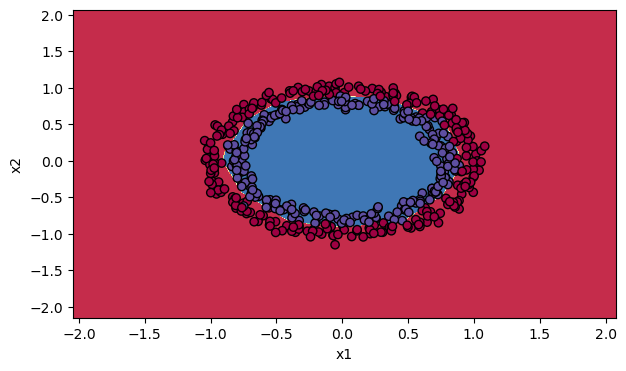

In [45]:
import numpy as np
import matplotlib.pyplot as plt

X = train_X  # Suponiendo que train_X tiene forma (num_samples, 2)
Y = train_Y  # Suponiendo que train_Y tiene forma (num_samples,)

# Ajustar min y max con padding
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.01

# Generar una cuadrícula de puntos
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir valores para toda la cuadrícula
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Convertir grid a (num_points, 2)

Z = model.predict(grid_points)  # Predicción del modelo

# Si `model.predict()` devuelve valores continuos, convertirlos a clases (0 o 1)
if Z.ndim > 1:
    Z = Z.squeeze()  # Convertir de (N,1) a (N,)
Z = (Z > 0.5).astype(int)  # Binarizar la salida si es un modelo de clasificación

# Ajustar la forma de `Z` para que coincida con `xx.shape`
Z = Z.reshape(xx.shape)

# Graficar el contorno de la clasificación
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

# Etiquetas de los ejes
plt.ylabel('x2')
plt.xlabel('x1')

# Graficar los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, edgecolors='k')

# Mostrar gráfico
plt.show()
